## PCA Projection with ECFP6 Fingerprint

This notebook shows how to visualize chemical space of `B3DB` by projecting ECFP6 fingerprint to 2D using PCA. The Fingerprint will be computed with `RDKit` and PCA is performed with `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA

In [2]:
# data file name for BBB dataset with categorical data
bbb_fpath = "../B3DB/B3DB_classification.tsv"
# load data
df = pd.read_csv(bbb_fpath, sep="\t")

In [3]:
df

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7802,7803,antazoline,"n-benzyl-n-(4,5-dihydro-1h-imidazol-2-ylmethyl...",c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,2200.0,NaN,BBB-,InChI=1S/C17H19N3/c1-3-7-15(8-4-1)13-20(14-17-...,NaN,R14|R23|R50|,D,NaN
7803,7804,emedastine,"1-(2-ethoxyethyl)-2-(4-methyl-1,4-diazepan-1-y...",CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,3219.0,NaN,BBB+,InChI=1S/C17H26N4O/c1-3-22-14-13-21-16-8-5-4-7...,NaN,R15|R23|R50|,D,NaN
7804,7805,ketotifen,2-(1-methylpiperidin-4-ylidene)-6-thiatricyclo...,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,3827.0,NaN,BBB+,InChI=1S/C19H19NOS/c1-20-9-6-13(7-10-20)18-15-...,NaN,R15|R27|R50|,D,NaN
7805,7806,milrinone,6-methyl-2-oxo-5-pyridin-4-yl-1h-pyridine-3-ca...,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,4197.0,NaN,BBB-,InChI=1S/C12H9N3O/c1-8-11(9-2-4-14-5-3-9)6-10(...,NaN,R15|R23|R27|,D,NaN


In [4]:
# compute ECFP6 fingerprints
fps = []

for idx, row in df.iterrows():
    mol = Chem.MolFromSmiles(row["SMILES"])
    mol = Chem.AddHs(mol)
    
    fp = AllChem.GetMorganFingerprintAsBitVect(mol=mol, 
                                               radius=3, 
                                               nBits=2048,
                                               useChirality=True, 
                                               useFeatures=False)
    fps.append(fp.ToBitString())

In [5]:
fps_arr = np.array([np.fromiter(fp, "u1") for fp in fps])

In [6]:
fps_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
print("fingerprint array shape: ", fps_arr.shape)

fingerprint array shape:  (7807, 2048)


<IPython.core.display.Javascript object>


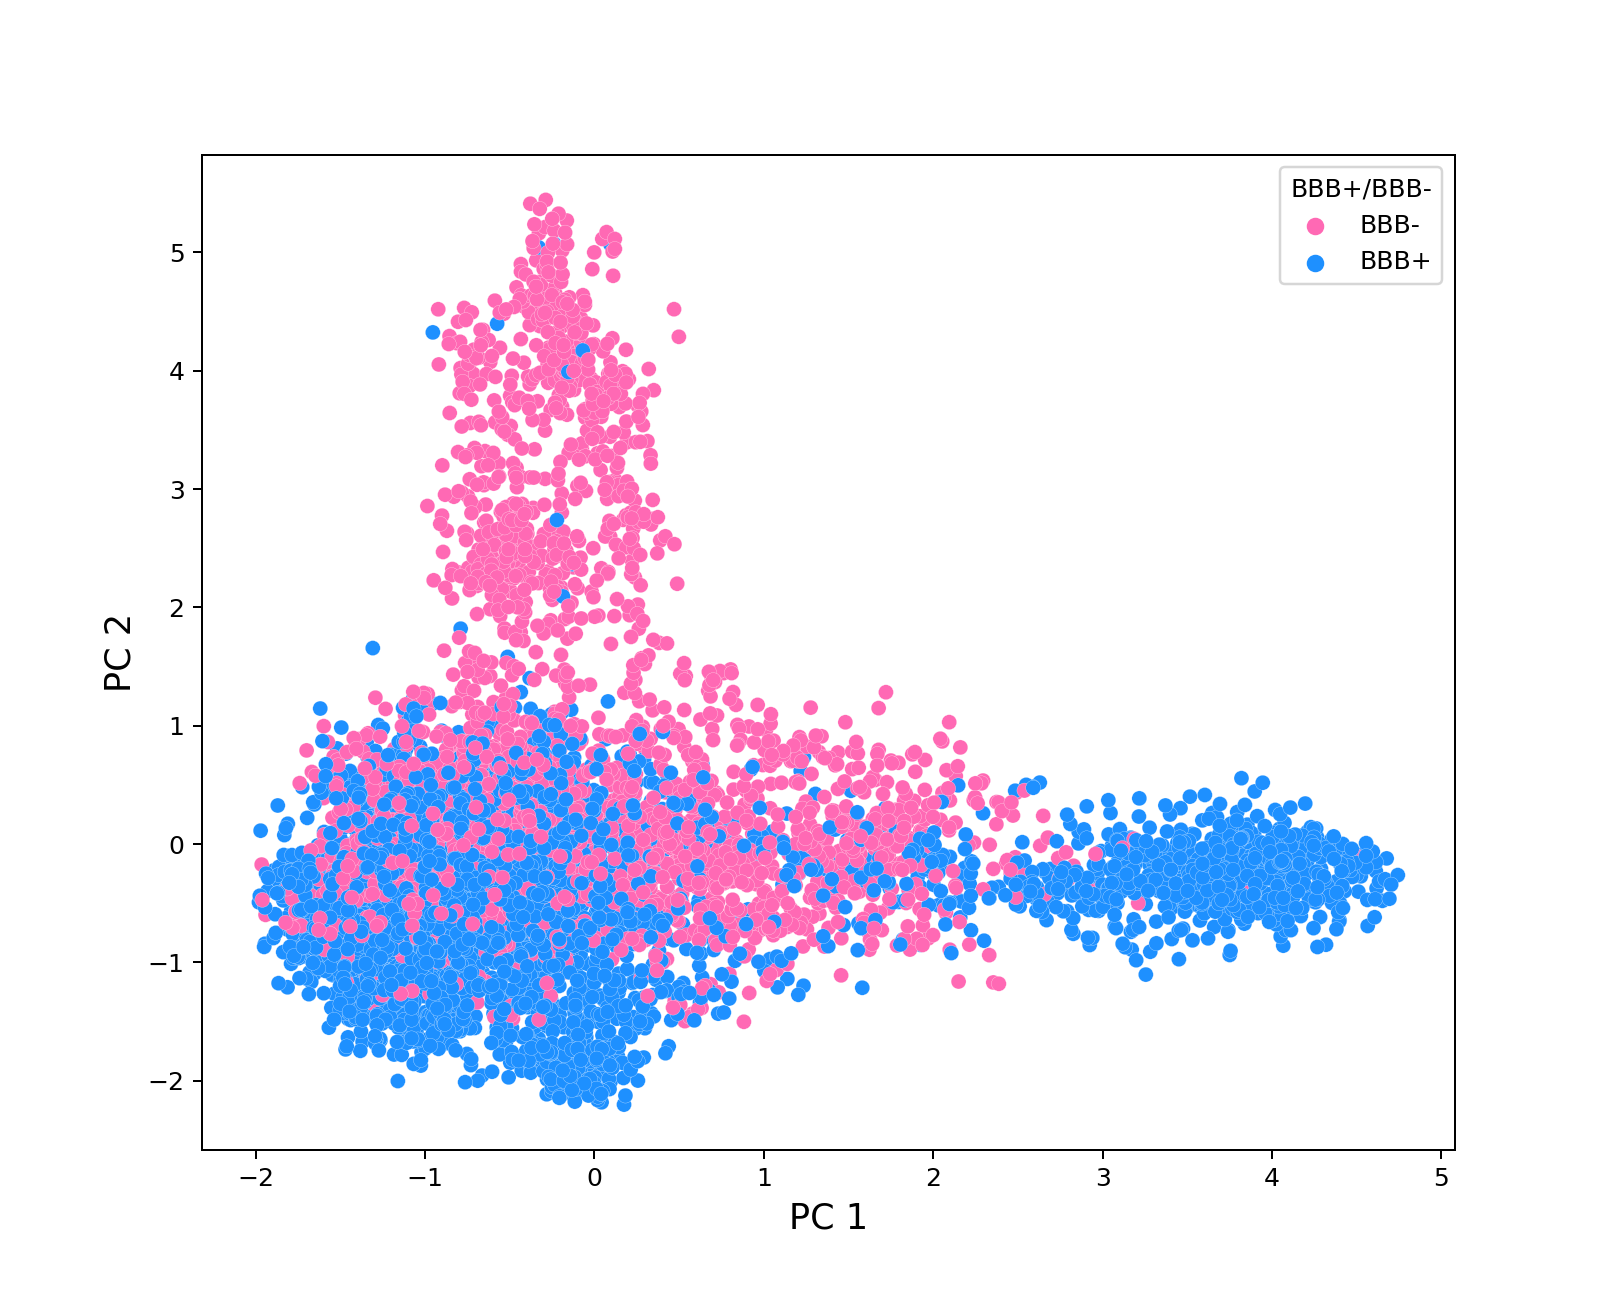

Text(0, 0.5, 'PC 2')

In [8]:
# visualization chemcial space using PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

df_fps = pd.DataFrame(fps_arr, index=df.index)
df_new = pd.concat([df, df_fps], axis=1)

fig = plt.figure(figsize=(5, 4))

pca = PCA(n_components=2)
arr_fp_embedded = pca.fit_transform(fps_arr)
df_new["PC_1"] = arr_fp_embedded[:, 0]
df_new["PC_2"] = arr_fp_embedded[:, 1]

sns.scatterplot(data=df_new, x="PC_1", y="PC_2",
                hue="BBB+/BBB-",
                palette=sns.color_palette(["hotpink", "dodgerblue"]),
                linewidth=0.1,
                )
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)